In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import davies_bouldin_score, silhouette_score

# Load datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [2]:
# Merge datasets
data = transactions.merge(customers, on='CustomerID')

In [3]:
# Aggregate transaction data per customer
customer_features = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spending
    'Quantity': 'sum',     # Total quantity purchased
    'TransactionID': 'count',  # Number of transactions
    'ProductID': 'nunique'  # Unique products purchased
}).reset_index()

In [4]:
# Normalize features using MinMaxScaler
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(customer_features.drop(columns=['CustomerID']))

In [5]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

In [6]:
# Find optimal clusters (2 to 10) using DB Index and Silhouette Score
db_scores = []
sil_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(features_pca)
    db_index = davies_bouldin_score(features_pca, clusters)
    sil_score = silhouette_score(features_pca, clusters)
    db_scores.append((k, db_index))
    sil_scores.append((k, sil_score))



C:\Users\konga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\konga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\konga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\konga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

In [7]:



# Select best cluster count based on DB Index and Silhouette Score
best_k = min(db_scores, key=lambda x: x[1])[0]
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
customer_features['Cluster'] = kmeans.fit_predict(features_pca)



C:\Users\konga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
# Apply DBSCAN for density-based clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
customer_features['DBSCAN_Cluster'] = dbscan.fit_predict(features_pca)

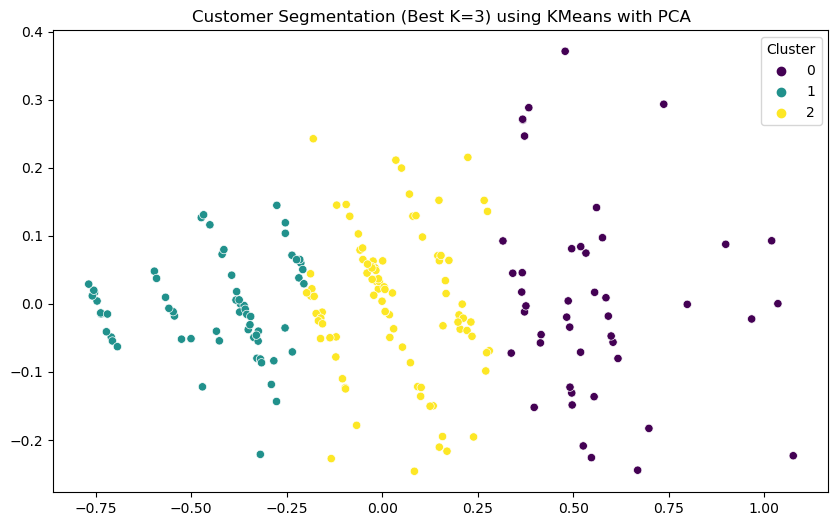

In [9]:

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=customer_features['Cluster'], palette='viridis')
plt.title(f'Customer Segmentation (Best K={best_k}) using KMeans with PCA')
plt.show()


In [10]:

# Print DB Index and Silhouette Score for evaluation
best_db_index = min(db_scores, key=lambda x: x[1])[1]
best_sil_score = max(sil_scores, key=lambda x: x[1])[1]
print(f'Best Cluster Count: {best_k}, DB Index: {best_db_index}, Silhouette Score: {best_sil_score}')

Best Cluster Count: 3, DB Index: 0.6887486670796849, Silhouette Score: 0.5038697046814994
